In [6]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import numpy as np
import seaborn as sns
%matplotlib inline

/Users/tomsasani/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/tomsasani/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/tomsasani/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/tomsasani/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/tomsasani/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/tomsasani/anaconda2/lib/python2.7/site-packages/ipyke

In [7]:
def to_binary(signal):
    """
    convert normalized Red1 signal to
    a binary value
    
    signal: float
    """
    if signal > 0: return 1
    else: return 0

In [8]:
def mean_signal_per_window(a, w=1000):
    """
    mean signal in non-overlapping windows 
    of specified size
    
    a: list of floats
    """
    import numpy as np
    o = []
    print np.array(a), np.array(a).shape
    s = np.array_split(np.array(a), w)
    return [np.median(a) for a in s]


In [9]:
def convert_chrom_notation(chrom):
    """
    add 'chr' prefixes
    """
    if 'chr' in str(chrom):
        return str(chrom)
    else: return 'chr' + str(chrom)

## Read in the methylation and Red1 ChIP data

We'll need to make sure chromosome notation is constant in both files.

In [10]:
# read in the Red1 data, and use new, simpler column names
red1 = pd.read_csv("red1-chip.tsv", sep="\t", header=0, 
                       names=["chrom", "pos", "background", "red1", "signal"])

# add chromosome prefixes
red1['chrom'] = red1['chrom'].apply(convert_chrom_notation)

# take a look at the data
red1.head()

,chrom,pos,background,red1,signal
0,chr1,0.0,6.235623,4.799593,-1.436030
1,chr1,20.0,9.137913,6.261566,-2.876348
2,chr1,40.0,13.792086,8.325515,-5.466572
3,chr1,60.0,20.856244,11.261384,-9.594860
4,chr1,80.0,30.879400,15.423920,-15.455480


In [11]:
# read in the ONT methylation data
# rename "methylated_frequency" to "signal"
meth = pd.read_csv("methylation-frequency.tsv", sep='\t', header=0, 
                       names=["chrom", "pos", "end", "num_cpg_motifs", "depth", 
                              "methylated_reads", "signal", "sequence"])

meth.drop(columns=['end'], inplace=True)

# take a look at the data
meth.head()

,chrom,pos,num_cpg_motifs,depth,methylated_reads,signal,sequence
0,chr1,144,1,9,1,0.111,CCACTCGTTAC
1,chr1,175,1,1,1,1.000,CACTCCGAACC
2,chr1,216,1,3,0,0.000,CCCACCGTTAC
3,chr1,325,1,3,0,0.000,TGAAACGCTAA
4,chr1,339,1,2,0,0.000,ATGATCGTAAA


## Plot the raw methylation and Red1 signals across the genome

This ends up being pretty messy!

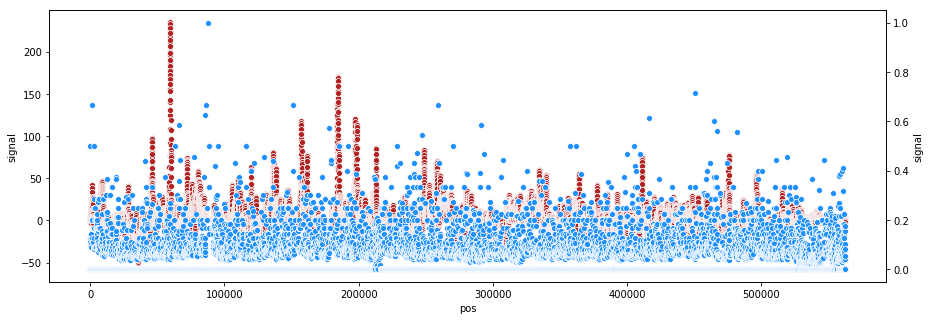

In [12]:
f, ax = plt.subplots(figsize=(15,5))

chrom = 'chr8'

meth_ = meth[meth['chrom'] == chrom]
red1_ = red1[red1['chrom'] == chrom]

ax2 = ax.twinx()

sns.scatterplot(x="pos", y="signal", data=red1_, ax=ax, color='firebrick')
sns.scatterplot(x="pos", y="signal", data=meth_, ax=ax2, color='dodgerblue')

## Bin genome-wide signals into windows 

After binning the existing data into windows, we'll calculate the mean signal per window. This makes the plots much easier to parse, but it might be too simplistic to simply take the per-window mean.

[0.273 0.273 0.364 0.333 0.364 0.286 0.273 0.294 0.286 0.3   0.438 0.286
 0.273 0.267 0.263 0.267 0.357 0.583 0.286 0.455 0.417 0.294 0.263 0.273
 0.353 0.333 0.5   0.286 0.429 0.455 0.286 0.333 0.438 0.312 0.267 0.267
 0.273 0.273 0.375 0.273 0.273 0.5   0.273 0.385 0.308 0.364 0.273 0.333
 0.417 0.273 0.267 0.312 0.333 0.267 0.385 0.429 0.471 0.375 0.286 0.333
 0.545 0.267 0.278 0.308 0.333 0.286 0.286 0.333 0.273 0.389 0.385 0.389
 0.333 0.583 0.467 0.333 0.273 0.273 0.278 0.333 0.267 0.273 0.357 0.357
 0.333 0.273 0.286 0.278 0.308 0.385 0.273 0.273 0.273 0.353 0.375 0.312
 0.467 0.267 0.5   0.333 0.417 0.467 0.286 0.308 0.615 0.273 0.267 0.273
 0.364 0.286 0.333 0.308 0.308 0.364 0.562 0.308 0.429 0.333 0.267 0.364
 0.286 0.278 0.333 0.333 0.273 0.273 0.455 0.333 0.267 0.294 0.273 0.286
 0.367 0.323 0.308 0.258 0.379 0.267 0.385 0.4   0.409 0.318] (142,)
[10.34722471 13.32367063 15.30232637 ... 10.81553184 10.75149699
 10.35844172] (6582,)


Text(0,0.5,'Mean methylation frequency')

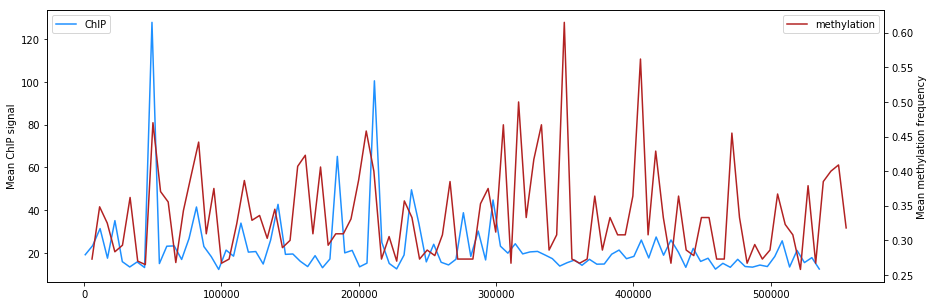

In [13]:
from scipy.interpolate import BSpline
import scipy.stats as ss

# create the figure object
f, ax = plt.subplots(figsize=(15,5))
ax2 = ax.twinx()

# the chromosome we want to look at
chrom = 'chr8'

# subset the data to exclude sites with zero signal
# also, exclude methylation sites with fewer than 10 reads
meth_filt = meth.query('depth > 10 & signal > 0.25')
red1_filt = red1.query('signal > 10')

def bin_data(df, chrom='chr8', n_windows=100):
    """
    given a dataframe, subset to the chromosome of interest
    and calculate the median signal per window
    """
    # filter to only include the chromosome of interest
    df = df[df['chrom'] == chrom]
    # get arrays of positions and signals at those positions
    sites, signal = df['pos'].values, df['signal'].values
    # divide the data into `n_windows` and find the positions
    # that separate those windows (`edges`)
    _, edges = np.histogram(sites, n_windows)
    edges = edges[:-1]
    # calculate the mean signal per window
    mean_signal = mean_signal_per_window(signal, w=n_windows)
    
    return edges, mean_signal

# get the bin coordinates and mean signal per bin
meth_x, meth_y = bin_data(meth_filt, chrom=chrom, n_windows=100)
red1_x, red1_y = bin_data(red1_filt, chrom=chrom, n_windows=100)

ax.plot(red1_x, red1_y, color="dodgerblue", label="ChIP")
ax2.plot(meth_x, meth_y, color="firebrick", label="methylation")

ax.legend(loc="upper left")
ax.set_ylabel("Mean ChIP signal")
ax2.legend(loc="upper right")
ax2.set_ylabel("Mean methylation frequency")

## Smooth the genome-wide signals 

Here, we'll try interpolating the methylation and Red1 signals using a smaller set of x-values. In this way, we can smooth out the signal-vs-position plots a bit.

Text(0,0.5,'Mean methylation frequency')

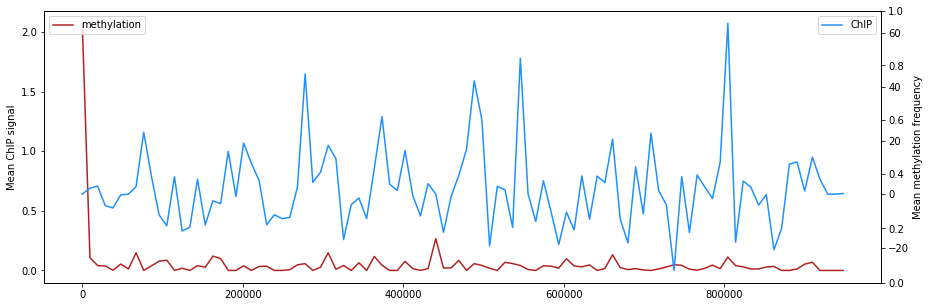

In [14]:
from scipy.interpolate import BSpline
import scipy.stats as ss

# create the figure object
f, ax = plt.subplots(figsize=(15,5))
ax2 = ax.twinx()

# the chromosome we want to look at
chrom = 'chr16'
meth_ = meth[meth['chrom'] == chrom]
red1_ = red1[red1['chrom'] == chrom]

# get arrays of positions and signals for both methylation and Red1 ChIP data
meth_x, meth_y = meth_['pos'].values, meth_['signal'].values
red1_x, red1_y = red1_['pos'].values, red1_['signal'].values

# use interpolation to "smooth" the existing data
meth_x_new = np.linspace(min(meth_x), max(meth_x), 100)
meth_spl = BSpline(meth_x, meth_y, 3)
red1_x_new = np.linspace(min(red1_x), max(red1_x), 100)
red1_spl = BSpline(red1_x, red1_y, 3)

ax2 = ax.twinx()

# plot the interpolated points
sns.lineplot(meth_x_new, meth_spl(meth_x_new), color='firebrick', label='methylation', ax=ax)
sns.lineplot(red1_x_new, red1_spl(red1_x_new), color='dodgerblue', label='ChIP', ax=ax2)

ax.legend(loc="upper left")
ax.set_ylabel("Mean ChIP signal")
ax2.legend(loc="upper right")
ax2.set_ylabel("Mean methylation frequency")

## Plot regions of the genome with and without methylation or Red1 signal

Instead of plotting raw signals, let's try to convert every Red1 or methylation observation into a binary "yes/no" value, which simply represents the presence or absence of ChIP binding or methylation.

In [15]:
def obs_per_window(a, w=1000):
    """
    count the number of events in
    non-overlapping windows of specified size
    
    a: list of integers
    """
    o = []
    bins = len(a) / w
    s, e = 0, w
    for b in range(bins):
        b_count = sum(a[s:e])
        o.append(b_count)
        s += w
        e += w
    return o

## Catalog every site where we observe Red1 binding signal

In [16]:
# convert normalized Red1 signals to binary values
red1['binary_signal'] = red1['signal'].apply(to_binary)

chrom_sizes = defaultdict(int)

# get lists of binary Red1 signals (in 20 bp windows) for each chromosome
# also, record the max length of each chromosome
red1_signal = defaultdict(list)
for v in red1[['chrom', 'pos', 'binary_signal']].values:
    red1_signal[v[0]].append(v[2])
    if chrom_sizes[v[0]] < v[1]:
        chrom_sizes[v[0]] = v[1]

## Catalog every site where we observe methylation

Also, bin the observations into 20 bp bins, so that the data are equivalent to the Red1 data.

In [19]:
# filter the data to include only high quality methylated sites
meth_filt = meth.query('depth > 10 & signal > 0')

# record the position of each high quality methylation event on each chromosome
methylation_counts = defaultdict(list)
for v in meth_filt[['chrom', 'pos']].values:
    methylation_counts[v[0]].append(v[1])
    
meth_signal = defaultdict(list)

# loop over every chromosome, and create a histogram of 
# methylation counts per 20 bp bin
for chrom in methylation_counts:
    # create as many bins as needed to have one 
    # every 20 bp on the chromosome
    bins = int(chrom_sizes[chrom] / 20)
    if bins == 0: continue
    hist, edges = np.histogram(methylation_counts[chrom], bins=bins)
    meth_signal[chrom] = list(hist)

## Plot the genome-wide distribution of methylation and Red1 counts

Here, we can bin the data further, since plotting thousands of 20 bp bins can be pretty messy.

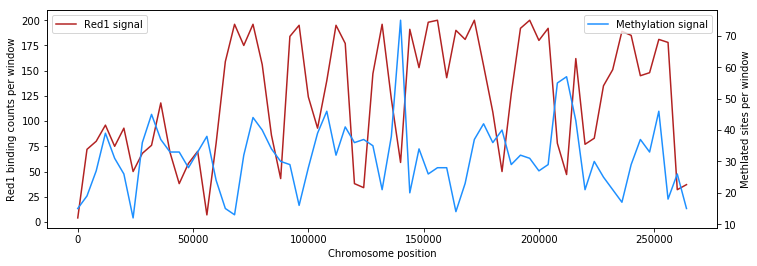

In [20]:
# create the figure object
f, ax = plt.subplots(figsize=(12,4))

chrom = 'chr6'
window = 200

# get the number of Red1 binding events or methylated sites
# per `window` * 20bp interval
m = obs_per_window(meth_signal[chrom], w=window)
r = obs_per_window(red1_signal[chrom], w=window)

# make sure the x values correspond to the true genomic positions
x = [i*20*window for i in range(len(m))]

ax2 = ax.twinx()

ax.plot(x, r, color='firebrick', label='Red1 signal')
ax2.plot(x, m, color='dodgerblue', label='Methylation signal')

ax.set_xlabel('Chromosome position')
ax.set_ylabel('Red1 binding counts per window')
ax2.set_ylabel('Methlated sites per window')

ax.legend()
ax2.legend()

## Use a hidden Markov model (HMM) to define broad regions of methylation or ChIP binding

This is super preliminary, but could be useful to segment the data into more usable chunks.

In [21]:
from pomegranate import *

In [22]:
red1_binding_sites = defaultdict(list)

# catalog every Red1 binding site as a binary "yes" or "no"
# binding event
for i,row in red1.iterrows():
    red1_binding_sites[row['chrom']].append(row['binary_signal'])
        
red1_hmm = defaultdict(list)

# loop over every chromosome and use an HMM to segment
# the binding profiles into broad regions
for idx, chrom in enumerate(red1_binding_sites):
    mx, my = [], []
    
    # define the expected profiles of "bound" or 
    # "unbound" regions (95% of sites should have Red1 signal
    # in a "bound" region, with up to 5% of sites without Red1 signal)
    d1 = DiscreteDistribution({1: 0.05, 0: 0.95})
    d2 = DiscreteDistribution({1: 0.95, 0: 0.05})

    s1 = State(d1, name='unbound')
    s2 = State(d2, name='bound')

    # initiate the model
    hmm = HiddenMarkovModel()
    hmm.add_states(s1, s2)
    hmm.add_transition(hmm.start, s1, 0.5)
    hmm.add_transition(hmm.start, s2, 0.5)
    # define the transition probabilities (i.e, the probability of
    # switching from a bound region to an unbound region). we intentionally
    # make these probabilities extreme so that the model doesn't randomly
    # switch back and forth if there's a little noise in the data
    hmm.add_transition(s1, s1, 0.99)
    hmm.add_transition(s1, s2, 0.01)
    hmm.add_transition(s2, s1, 0.01)
    hmm.add_transition(s2, s2, 0.99)
    hmm.bake()
    
    # use the HMM to predict the binding profiles on the chromosome
    hmm_predictions = hmm.predict(red1_binding_sites[chrom])
    
    switch_dict = {1:0, 0:1}
    
    if hmm.states[0].name == 'bound':
        hmm_predictions = [switch_dict[e] for e in hmm_predictions]
    
    # record this chromosome's binding profile
    red1_hmm[chrom] = hmm_predictions
print red1_hmm[:100]

defaultdict(<type 'list'>, {'chr7': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 

## Plot reads that span multiple methylated sites

Also, quite preliminary, but a quick visualization.

In [23]:
# read in a file that contains information about each methylated site
# in every read in the dataset. i've filtered this file to only include
# sites in reads that have a `log_lik_ratio` > 2.5 (i.e, are methylated)
df = pd.read_csv("methylation.log-lik-pos.tsv", sep='\t')
# take a look at the data
df.head()

,chromosome,start,end,read_name,log_lik_ratio,log_lik_methylated,log_lik_unmethylated,num_calling_strands,num_motifs,sequence
0,chr1,955,955,2052cc83-cbd0-4195-bdc7-fad17ac92ec6,4.32,-225.03,-229.35,1,1,TTCACCGAGCA
1,chr1,1976,1976,2052cc83-cbd0-4195-bdc7-fad17ac92ec6,6.23,-249.76,-255.99,1,1,AACTTCGACTG
2,chr1,2445,2445,2052cc83-cbd0-4195-bdc7-fad17ac92ec6,3.19,-241.49,-244.68,1,1,TATGGCGCTTA
3,chr1,2563,2563,2052cc83-cbd0-4195-bdc7-fad17ac92ec6,4.74,-140.77,-145.51,1,1,ATATCCGAATT
4,chr1,988,988,4185a175-97d6-4174-9204-ef12fd3385bb,8.85,-194.53,-203.37,1,1,TCATGCGGGTG


In [ ]:
read_intervals = defaultdict(list)
methylated_sites = defaultdict(list)
# catalog every methylated site in reads that contain methylation
# events. later, we'll use this information to figure out how long
# the read is. also, catalog every methylated site on each chromosome.
for i,row in df.iterrows():
    read_name = row['read_name']
    read_intervals[read_name].append((row['chromosome'], str(row['end'])))
    methylated_sites[row['chromosome']].append(row['end'])
    
per_chrom_intervals = defaultdict(list)
# for every chromosome, store the full span of each read's methylation events
for read in read_intervals:
    positions = [int(p[-1]) for p in read_intervals[read]]
    chroms = [p[0] for p in read_intervals[read]]
    d = defaultdict(list)
    for k,v in zip(chroms, positions):
        d[k].append(v)
    for chrom in d:
        per_chrom_intervals[chrom].append((min(d[chrom]), max(d[chrom]), read))

In [ ]:
f, axarr = plt.subplots(len(per_chrom_intervals), 1, figsize=(10, 60))

# loop over all of the reads associated with the chromosome
# and plot the span of the read if it spans at least 1 methylated
# site1.
for idx,chrom in enumerate(per_chrom_intervals):
    print chrom
    #if chrom != 'chr1': continue
    for interval in per_chrom_intervals[chrom]:
        # make sure the read span is as least 10 kbp, and less than
        # 100 kbp (reads that span more than 100 kbp are almost certainly
        # split up into multiple alignment that just happen to align at
        # disparate ends of the chromosome, and don't represent contiguous
        # alignment).
        if interval[1] - interval[0] < 1000: continue
        if interval[1] - interval[0] > 100000: continue
            
        x = [interval[0], interval[1]]
        # add dither to reads when we plot them
        y = np.ones(2) + np.random.normal(loc=0, scale=1)
        
        chrom_methylated_sites = list(set(methylated_sites[chrom]))
        n = len(chrom_methylated_sites)
        for i,site in enumerate(sorted(chrom_methylated_sites)):
            if i == n-1: break
            # check if this methylated site and the following methylated site both
            # lie within the bounds of one of the reads
            if site in x and chrom_methylated_sites[i+1] in x:
                print 'read {} on chrom {} spans two methylated sites'.format(interval[-1],
                                                                              str(chrom) + ':' + str(x[0]) + '-' + str(x[1]))
                axarr[idx].plot(x, y, color='k')
                axarr[idx].scatter([site, chrom_methylated_sites[i+1]],
                                   np.ones(2), facecolors='none', edgecolor='r')
                axarr[idx].set_title(chrom)
f.tight_layout()